<a href="https://colab.research.google.com/github/Darkling-01/Airbnb-Machine-Learning/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project is for Machine Learning CSE5160

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from google.colab import files

print("SETUP COMPLETE...")

SETUP COMPLETE...


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/airbnb_data.csv')
dataset

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,...,40.709025,-73.939405,one room bushwick,Williamsburg,0,NaN,https://a0.muscache.com/im/pictures/55162426/6...,11206.0,1.0,1.0
74107,13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,...,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206.0,2.0,2.0
74109,17045948,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,...,40.738535,-74.000157,Designer's Apartment in HEART of NYC,West Village,0,NaN,https://a0.muscache.com/im/pictures/b3971b63-0...,10011,0.0,2.0


In [ ]:
print('Number of rows in the dataframe:', dataset.shape[0])
print('Number of columns in the dataframe:', dataset.shape[1])

Number of rows in the dataframe: 74111
Number of columns in the dataframe: 29


In [ ]:
dataset.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [ ]:
#avoid bias or variance
dataset = dataset.sample(frac = 1)

In [ ]:
#add column to dataset
futurePrice = []
dataset2 = dataset.assign(future_price = 0)
dataset2

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,future_price
22475,9758070,5.192957,Apartment,Entire home/apt,"{""Wireless Internet"",Kitchen,Heating,""Smoke de...",2,1.0,Real Bed,strict,True,...,-122.417630,Charming&Central 1 brd with views,Nob Hill,4,100.0,https://a0.muscache.com/im/pictures/000c2c32-d...,94109,1.0,1.0,0
13186,15740473,4.060443,House,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,2.0,Real Bed,strict,True,...,-73.925363,(203) 10min to Manhattan/ Astoria Guest Haus,Astoria,30,93.0,https://a0.muscache.com/im/pictures/bfe78301-e...,NaN,1.0,1.0,0
54089,4342581,4.488636,House,Private room,"{Internet,""Wireless Internet"",Kitchen,""Pets li...",3,1.0,Real Bed,strict,True,...,-122.419630,2 Beds in Cozy Mission Room,Mission District,88,96.0,https://a0.muscache.com/im/pictures/110794809/...,94110,1.0,2.0,0
4618,17700365,4.382027,Apartment,Entire home/apt,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,flexible,True,...,-118.282051,Amazing Studio in Sunset Junction!,Silver Lake,0,NaN,https://a0.muscache.com/im/pictures/0ffb4d89-1...,90029,0.0,1.0,0
2364,5604704,4.317488,House,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",1,1.0,Real Bed,flexible,False,...,-71.072408,"Close to the zoo, shops and T",Dorchester,0,NaN,NaN,02124,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12285,10454632,4.828314,Apartment,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",2,1.0,Pull-out Sofa,flexible,True,...,-76.980660,Short walk to H ST NE and a StreetCar,Kingman Park,1,100.0,https://a0.muscache.com/im/pictures/20ecf6e8-4...,20002,1.0,1.0,0
58855,324517,4.584967,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,moderate,True,...,-118.265388,Beautiful pool house in Silverlake,Silver Lake,92,99.0,https://a0.muscache.com/im/pictures/51058219/0...,90039,0.0,1.0,0
15575,8813547,4.094345,Apartment,Private room,"{""Wireless Internet"",Kitchen,""Buzzer/wireless ...",2,1.0,Real Bed,strict,True,...,-73.985870,Sunny room Park Slope (women only),Park Slope,67,97.0,https://a0.muscache.com/im/pictures/110052427/...,11215,1.0,1.0,0
54760,883375,4.595120,Apartment,Entire home/apt,"{""Family/kid friendly""}",2,1.0,Real Bed,strict,True,...,-118.326658,Heart of Hollywood Close to All!,Hollywood Hills,63,97.0,NaN,90068,1.0,1.0,0


In [ ]:
X = dataset2[['log_price', 'property_type']].copy()
y = dataset2[['future_price']].copy()
X

,log_price,property_type
22475,5.192957,Apartment
13186,4.060443,House
54089,4.488636,House
4618,4.382027,Apartment
2364,4.317488,House
...,...,...
12285,4.828314,Apartment
58855,4.584967,House
15575,4.094345,Apartment
54760,4.595120,Apartment


In [ ]:
y

,future_price
22475,0
13186,0
54089,0
4618,0
2364,0
...,...
12285,0
58855,0
15575,0
54760,0


In [ ]:
X['intercept'] = 1
X = X[['intercept', 'log_price', 'property_type']]
X

,intercept,log_price,property_type
22475,1,5.192957,Apartment
13186,1,4.060443,House
54089,1,4.488636,House
4618,1,4.382027,Apartment
2364,1,4.317488,House
...,...,...,...
12285,1,4.828314,Apartment
58855,1,4.584967,House
15575,1,4.094345,Apartment
54760,1,4.595120,Apartment


In [ ]:
#Create our x transpose matrix using pandas
X_T = X.T
X_T
#Rows have become the column

,22475,13186,54089,4618,2364,26324,54435,37883,54507,20503,...,11151,36236,47712,34592,27305,12285,58855,15575,54760,6651
intercept,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
log_price,5.192957,4.060443,4.488636,4.382027,4.317488,4.382027,4.330733,4.828314,4.219508,5.521461,...,4.59512,5.105945,4.369448,5.003946,5.273,4.828314,4.584967,4.094345,4.59512,4.976734
property_type,Apartment,House,House,Apartment,House,Apartment,Apartment,Apartment,House,Apartment,...,Apartment,House,Apartment,Apartment,Apartment,Apartment,House,Apartment,Apartment,Apartment


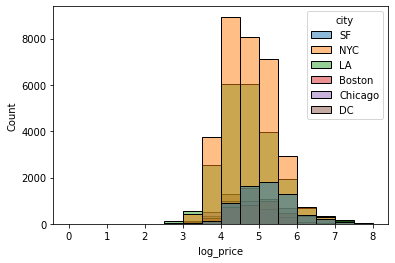

In [ ]:
#visualize the data set
#train log_price
sns.histplot(data = dataset, x = "log_price", binwidth = .5, hue = "city")

0.9028677115420143


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


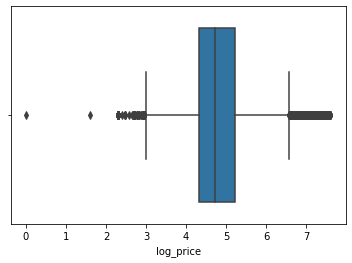

In [ ]:
sns.boxplot(dataset['log_price'])

#using the IQR method to find the outliers is commonly used and more trusted.
Q1 = np.percentile(dataset['log_price'], 25, interpolation = 'midpoint')
Q3 = np.percentile(dataset['log_price'], 75, interpolation = 'midpoint')

IQR = Q3 - Q1
print(IQR)
#round up quartile if decimal: 0.90 = 1

In [ ]:
#find the attributes
#X is independent
X = np.array(dataset.drop(["description"],1))
print("Shape of X: ", X.shape)
print(X)
#y is dependent
y = np.array(dataset["description"])
print("Shape of y: ", y.shape)
print(y)

Shape of X:  (74111, 28)
[[16838955 5.293304824724492 'Apartment' ... '11249.0' 1.0 1.0]
 [2437011 4.442651256490317 'House' ... '90066' 1.0 1.0]
 [2318200 7.309881485824786 'House' ... '90293' 6.0 8.0]
 ...
 [17403306 4.836281906951479 'House' ... '90291' 2.0 2.0]
 [9748012 4.31748811353631 'House' ... '91030' 1.0 1.0]
 [12256288 4.672828834461906 'Apartment' ... '11212.0' 2.0 3.0]]
Shape of y:  (74111,)
['My apartment is a brand new modern one bedroom, one bathroom with a washer/dryer.  The building is full of great amenities such as gym, roof deck, several lounges and bocce ball court.  There is free wifi all over the building.'
 "Welcome! We're looking forward to hosting you in our beautiful home. Enjoy yourself in warm & sunny Los Angeles. The ocean calls your name with a short 15 minute bike ride. LAX is a 20 minute drive away. Centrally located to the 10 & 405 freeway. Welcome! Whether you are visiting for business or pleasure enjoy the security of a  meticulously clean, warm an

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
#Splitting
n_train = math.floor(0.8 * X.shape[0])
n_test = math.ceil((1 - 0.8)* X.shape[0])

X_train = X[:n_train]
y_train = y[:n_train]
X_test = X[n_train:]
y_test = y[n_train:]

print("Total number of rows in train: ", X_train.shape[0])
print("Total number of rows in test: ", X_test.shape[0])

Total number of rows in train:  59288
Total number of rows in test:  14823


In [21]:
#Coding the linear regression class
class linearRegression():
  def __init__(self):    #creates new object when class is called
    #no instance is required
    pass

  def forward(self, X, y, W):
    """
    Parameters:
    X - independent
    y - dependent/target
    W - Wights

    Returns:
    loss - calculate sqaured erroe loss for y and y_pred
    y_pred - predicted target variable
    """
    y_pred = sum(W * X)
    loss = ((y_pred - y) ** 2) / 2

    return loss, y_pred

  def updateWeights(self, X, y_pred, y_true, W, alpha, index):


    for i in range(X.shape[1]):
      W[i] -= (alpha * (y_pred-y_true[index]) * X[index][i])
      return W
  def train(self, X, y, epochs=10, alpha=0.001, random_state=0):
    """
    Parameters:
    X (array) : Independent Feature
    y (array) : Dependent Features/ Target Variable
    epochs (int) : Number of epochs for training, default value is 10
    alpha (float) : learning rate, default value is 0.001

    Returns:
    y_pred (array) : Predicted Target Variable
    loss (float) : Calculated Sqaured Error Loss for y and y_pred
    """

    num_rows = X.shape[0] #Number of Rows
    num_cols = X.shape[1] #Number of Columns 
    W = np.random.randn(1,num_cols) / np.sqrt(num_rows) #Weight Initialization

    #Calculating Loss and Updating Weights
    train_loss = []
    num_epochs = []
    train_indices = [i for i in range(X.shape[0])]
    for j in range(epochs):
      cost=0
      np.random.seed(random_state)
      np.random.shuffle(train_indices)
      for i in train_indices:
        loss, y_pred = self.forward(X[i],y[i],W[0])
        cost+=loss
        W[0] = self.updateWeights(X,y_pred,y,W[0],alpha,i)
      train_loss.append(cost)
      num_epochs.append(j)
    return W[0], train_loss, num_epochs

  def test(self, X_test, y_test, W_trained):
    """
    Parameters:
    X_test (array) : Independent Features from the Test Set
    y_test (array) : Dependent Features/ Target Variable from the Test Set
    W_trained (array) : Trained Weights
    test_indices (list) : Index to fetch the corresponding values of W_trained,
                          X_test and y_test 

    Returns:
    test_pred (list) : Predicted Target Variable
    test_loss (list) : Calculated Sqaured Error Loss for y and y_pred
    """
    test_pred = []
    test_loss = []
    test_indices = [i for i in range(X_test.shape[0])]
    for i in test_indices:
        loss, y_test_pred = self.forward(X_test[i], W_trained, y_test[i])
        test_pred.append(y_test_pred)
        test_loss.append(loss)
    return test_pred, test_loss
    

  def plotLoss(self, loss, epochs):
    """
    Parameters:
    loss (list) : Calculated Sqaured Error Loss for y and y_pred
    epochs (list): Number of Epochs

    Returns: None
    Plots a graph of Loss vs Epochs
    """
    plt.plot(epochs, loss)
    plt.xlabel('Number of Epochs')
    plt.ylabel('Loss')
    plt.title('Plot Loss')
    plt.show()


In [26]:
regressor = linearRegression()

In [27]:
W_trained, train_loss, num_epochs = regressor.train(X_train, y_train, epochs=1000, alpha=0.0001)

KeyError: ignored